<a href="https://colab.research.google.com/github/hsouzaeduardo/CodersInRio/blob/main/C%C3%B3pia_de_CodersInRIo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Código de Apoio para processar os blocos de faces

In [ ]:
def show_faces(image_path, detected_faces, show_id=False):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    #Abra uma imagem
    img = Image.open(image_path)

    # Crie uma figura para exibir os resultados
    fig = plt.figure(figsize=(8, 6))

    if detected_faces:
        # If there are faces, how many?
        num_faces = len(detected_faces)
        prediction = ' (' + str(num_faces) + ' faces encontradas)'
        # Desenhe um retângulo ao redor de cada rosto detectado
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)
            if show_id:
                plt.annotate(face.face_id,(r.left, r.top + r.height + 15), backgroundcolor='white')
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(prediction)

    plt.axis('off')
    plt.imshow(img)

def show_face_attributes(image_path, detected_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Abra uma imagem
    img = Image.open(image_path)

    # Crie uma figura para exibir os resultados
    fig = plt.figure(figsize=(8, 6))

    if detected_faces:
        # Se houver rostos, quantos?
        num_faces = len(detected_faces)
        prediction = ' (' + str(num_faces) + ' faces encontradas)'
        # Desenhe um retângulo ao redor de cada rosto detectado
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)

            # Anotar com atributos de rosto (somente idade e emoção são usados nesta amostra)
            detected_attributes = face.face_attributes.as_dict()
            age = 'age unknown' if 'age' not in detected_attributes.keys() else int(detected_attributes['age'])
            annotations = 'Pessoa com idade aproximada {}'.format(age)
            txt_lines = 1
            if 'emotion' in detected_attributes.keys():
                for emotion_name in detected_attributes['emotion']:
                    txt_lines += 1
                    annotations += '\n - {}: {}'.format(emotion_name, detected_attributes['emotion'][emotion_name])
            plt.annotate(annotations,((r.left + r.width), (r.top + r.height + (txt_lines * 12))), backgroundcolor='white')

        # Plot the image
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(prediction)

    plt.axis('off')
    plt.imshow(img)

def show_similar_faces(image_1_path, image_1_face, image_2_path, image_2_faces, similar_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    
    fig = plt.figure(figsize=(16, 6))
    
    img1 = Image.open(image_1_path)
    r = image_1_face.face_rectangle
    bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
    draw = ImageDraw.Draw(img1)
    draw.rectangle(bounding_box, outline='magenta', width=5)
    a = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1)


    matching_face_ids = list(map(lambda face: face.face_id, similar_faces))


    img2 = Image.open(image_2_path)
    a = fig.add_subplot(1,2,2)
    plt.axis('off')
    for face in image_2_faces:
        r = face.face_rectangle
        bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
        draw = ImageDraw.Draw(img2)
        if face.face_id in matching_face_ids:
            draw.rectangle(bounding_box, outline='lightgreen', width=10)
            plt.annotate('Achei!',(r.left, r.top + r.height + 15), backgroundcolor='white')
        else:
            draw.rectangle(bounding_box, outline='red', width=5)
    plt.imshow(img2)
    plt.show()

def show_recognized_faces(image_path, detected_faces, recognized_face_names):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw


    img = Image.open(image_path)


    fig = plt.figure(figsize=(8, 6))

    if detected_faces:

        num_faces = len(recognized_face_names)
        caption = ' (' + str(num_faces) + ' faces encontradas)'

        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)
            if face.face_id in recognized_face_names:
                plt.annotate(recognized_face_names[face.face_id],
                             (r.left, r.top + r.height + 15), backgroundcolor='white')
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(caption)

    plt.axis('off')
    plt.imshow(img)

def show_image_caption(image_path, description):
    import matplotlib.pyplot as plt
    from PIL import Image

    # Display the image
    fig = plt.figure(figsize=(8, 8))
    img = Image.open(image_path)
    caption_text = ''
    if (len(description.captions) == 0):
        caption_text = 'No caption detected'
    else:
        for caption in description.captions:
            caption_text = caption_text + " '{}'\n(Confiabilidade: {:.2f}%)".format(caption.text, caption.confidence * 100)
    plt.title(caption_text)
    plt.axis('off')
    plt.imshow(img)

def show_image_analysis(image_path, analysis):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw
    import numpy as np

    # Display the image
    fig = plt.figure(figsize=(16, 8))
    a = fig.add_subplot(1,2,1)
    img = Image.open(image_path)
    
    # Get the caption
    caption_text = ''
    if (len(analysis.description.captions) == 0):
        caption_text = 'No caption detected'
    else:
        for caption in analysis.description.captions:
            caption_text = caption_text + " '{}'\n(Confidence: {:.2f}%)".format(caption.text, caption.confidence * 100)
    plt.title(caption_text)

    # Get objects
    if analysis.objects:
        # Draw a rectangle around each object
        for object in analysis.objects:
            r = object.rectangle
            bounding_box = ((r.x, r.y), (r.x + r.w, r.y + r.h))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)
            plt.annotate(object.object_property,(r.x, r.y), backgroundcolor='magenta')

    # Get faces
    if analysis.faces:
        # Draw a rectangle around each face
        for face in analysis.faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='lightgreen', width=5)
            annotation = 'Pessoa com idade aproximada {}'.format(face.age)
            plt.annotate(annotation,(r.left, r.top), backgroundcolor='lightgreen')

    plt.axis('off')
    plt.imshow(img)

    # Add a second plot for addition details
    a = fig.add_subplot(1,2,2)

    # Get ratings
    ratings = 'Ratings:\n - Adult: {}\n - Racy: {}\n - Gore: {}'.format(analysis.adult.is_adult_content,
                                                                           analysis.adult.is_racy_content,
                                                                           analysis.adult.is_gory_content,)

    # Get tags
    tags = 'Tags:'
    for tag in analysis.tags:
        tags = tags + '\n - {}'.format(tag.name)

    # Print details

    details = '{}\n\n{}'.format(ratings, tags)
    a.text(0,0.4, details, fontsize=12)
    plt.axis('off')
    plt.show()

In [ ]:
cog_key = 'c7e063ab71174e4cbd94c40a8f268cb4'
cog_endpoint = 'https://cog-coders-in-rio.cognitiveservices.azure.com/'

##Descrever imagem 

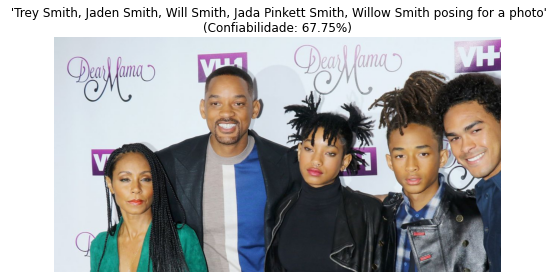

In [ ]:
!pip install azure.cognitiveservices.vision.computervision
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
import os

image_path = os.path.join('fotos', 'will-familia.jpg')
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)
show_image_caption(image_path, description)

##Descrever Image Com Tags especificas

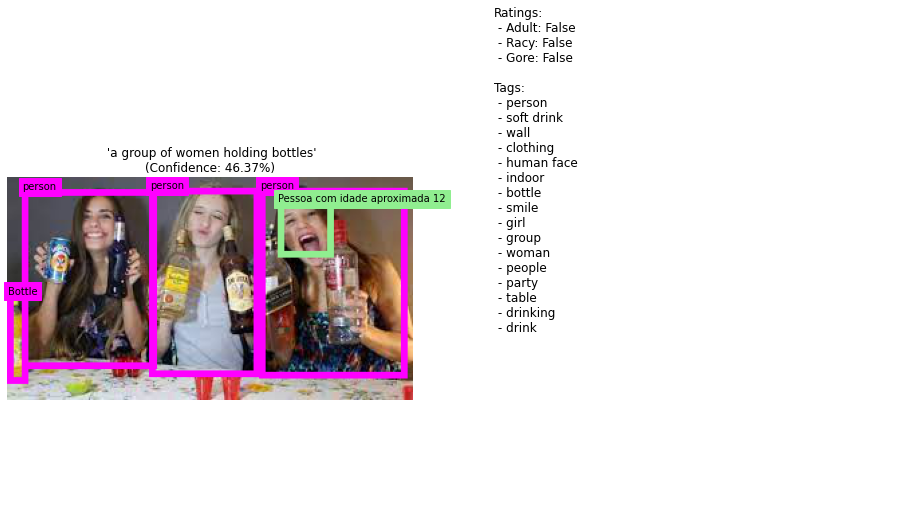

In [ ]:

image_path = os.path.join('fotos', 'bebida.jpg')

# Especifique os recursos que queremos analisar
features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

# Obtenha uma análise do serviço de visão computacional
image_stream = open(image_path, "rb")
analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=features)
show_image_analysis(image_path, analysis)

## Analisar atributos faciais


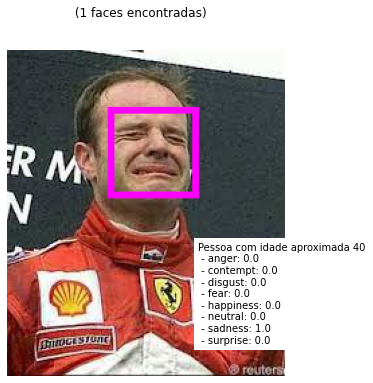

In [ ]:
!pip install azure.cognitiveservices.vision.face
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
# Abrir uma imagem
image_path = os.path.join('fotos', 'rubinho.jpg')
image_stream = open(image_path, "rb")

# Detectar rostos e atributos faciais especificados
attributes = ['age', 'emotion', 'accessories' ]
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

# Exibir os rostos e atributos (código em python_code/faces.py)
show_face_attributes(image_path, detected_faces)

## Encontrar rostos similares 

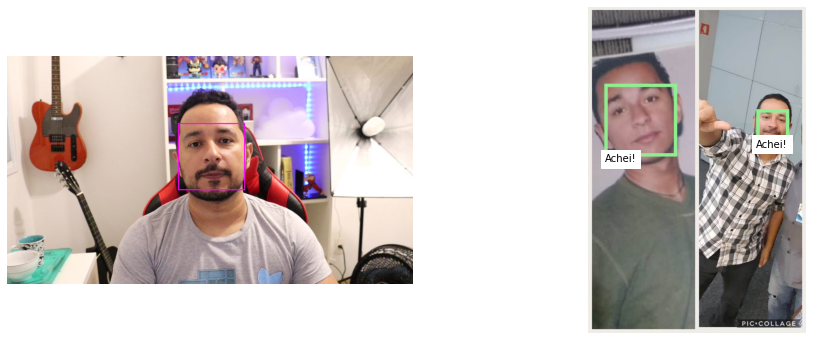

In [ ]:
# Obter a ID do primeiro rosto da imagem 1
image_1_path = os.path.join('fotos','Henrique', 'eu.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Obter as IDs dos rostos da segunda imagem
image_2_path = os.path.join('fotos', 'eu2x.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Encontrar rostos na imagem 2 parecidos com o da imagem 1
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Exibir o rosto da imagem 1 e os rostos semelhantes da imagem 2 (código em python_code/face.py)
show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)

##OCR

Redação
COMO ESCREVER UMA BOA REDAÇÃO #DICAS
DESCREVER CORRETAMENTE, SEM ERROS DE ACENTUAÇÃO, REGÊNCIA,
CONCORDÂNCIA ETC ., OBEDECENDO A NORMA
PADRÃO DA LÍNGUA
PORTUGUESA.
4) EVITAR FALHAS GRAVES QUE IMPLIQUEM NOTA ZERO.
LA ACUMULE UMA BAGAGEM CULTURAL ATRAVES DE SITES DE
JORNAIS E REVISTAS INFORMATIVAS.
LA LER COM ATENÇÃO E ENTENDER A PROPOSTA DE REDAÇÃO E OS
TEXTOS MOTIVADORES
LA CRIAR O HÁBITO DE ASSUMIR POSIÇÕES E DESENVOLVER
ARGUMENTOS.
4 CONHECER "CONECTIVOS" QUE PERMITAM UMA BOA CONCATENAÇÃO.
DAS ORAÇÕES E A TÉCNICA DE ALTERNAR FRASES MAIS CURTAS.
E MAIS LONGAS-
LA RESPEITAR OS DIREITOS HUMANOS EM SUA PROPOSTA DE
INTERVENÇÃO




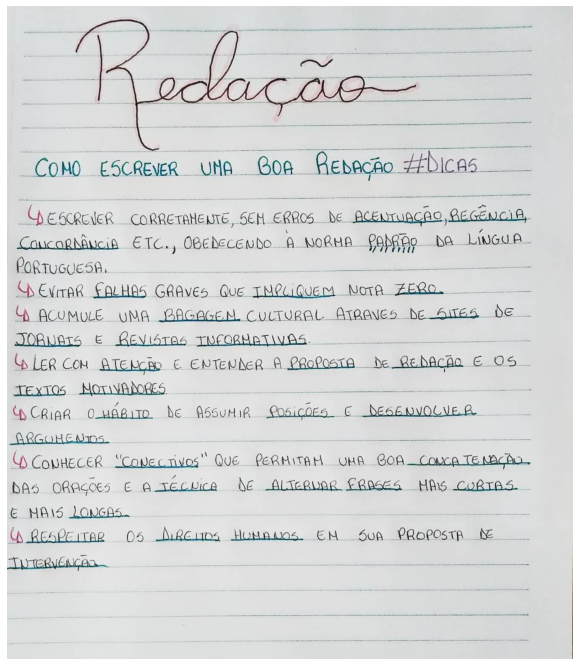

In [ ]:
!pip install azure.cognitiveservices.vision.computervision

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Ler o arquivo de imagem
image_path = os.path.join('fotos', 'redacao02.jpg')
image_stream = open(image_path, "rb")

# Obter um cliente para o serviço de pesquisa visual computacional
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Enviar uma solicitação para ler texto impresso na imagem e obter a ID da operação
read_operation = computervision_client.read_in_stream(image_stream,
                                                      raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Aguarde até que a operação assíncrona seja concluída
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# Se a operação for bem-sucedida, processe o texto linha por linha
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Abrir e exibir a imagem.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)

In [ ]:
group_id = 'grupo_trabalho'
try:
    face_client.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    face_client.person_group.create(group_id, 'trabalhadores')
    print ('Grupo Criado!')

Grupo Criado!


IsADirectoryError: ignored

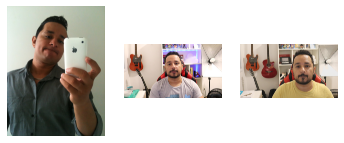

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Add a person (Henrique) to the group
wendell = face_client.person_group_person.create(group_id, 'Henrique')

# Get photo's of Henrique
folder = os.path.join('fotos', 'Henrique')
wendell_pics = os.listdir(folder)

# Register the photos
i = 0
fig = plt.figure(figsize=(8, 8))
for pic in wendell_pics:
    # Add each photo to person in person group
    img_path = os.path.join(folder, pic)
    img_stream = open(img_path, "rb")
    face_client.person_group_person.add_face_from_stream(group_id, wendell.person_id, img_stream)

    # Display each image
    img = Image.open(img_path)
    i +=1
    a=fig.add_subplot(1,len(wendell_pics), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()

In [ ]:
face_client.person_group.train(group_id)
print('Treinado!')

In [ ]:
image_path = os.path.join('fotos', 'eufesta.jpg')
image_stream = open(image_path, "rb")
image_faces = face_client.face.detect_with_stream(image=image_stream)
image_face_ids = list(map(lambda face: face.face_id, image_faces))

# Get recognized face names
face_names = {}
recognized_faces = face_client.face.identify(image_face_ids, group_id)
for face in recognized_faces:
    person_name = face_client.person_group_person.get(group_id, face.candidates[0].person_id).name
    face_names[face.face_id] = person_name

# show recognized faces
show_recognized_faces(image_path, image_faces, face_names)